Matplotlib is building the font cache; this may take a moment.


before training loss: 3340.1248261786727
After training loss: 7.871496154102539


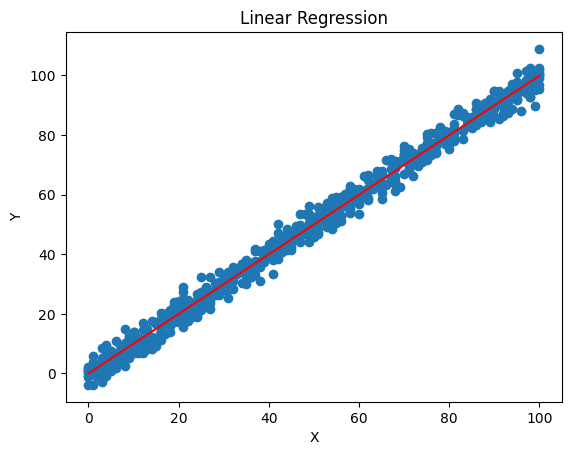

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def mse(actual, predicted):
    n = len(actual)
    loss = sum([(y_i - y_p) ** 2 for y_i, y_p in zip(actual, predicted)]) / n
    return loss

if __name__=='__main__':
    # Open the dataset
    df = pd.read_csv('data_for_lr.csv')
    X = df['x']
    Y = df['y']
    n = len(X)
    
    m = 0
    b = 0
    alpha = 0.0001 # Learning rate

    # Before Loss
    Y_hat = m * X + b
    loss = mse(Y, Y_hat)
    print('before training loss:', loss)
    
    iter = 10
    for _ in range(iter): 
        Y_hat = m * X + b  

        dL_dm = (2 / n) * sum((Y_hat - Y) * X)
        dL_db = (2 / n) * sum(Y_hat - Y)
                
        m = m - dL_dm * alpha
        b = b - dL_db * alpha
        
        # print('m, b', m, b)

    # After loss
    Y_hat = m * X + b
    loss = mse(Y, Y_hat)
    print('After training loss:', loss)
    
    # Plot the dataset
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(X, Y)
    plt.title('Linear Regression')

    # Draw the regression line
    line_X = np.linspace(np.min(X), np.max(X), 100)
    line_Y = line_X * m + b
    plt.plot(line_X, line_Y, color='red', label=f"y = {m}x + {b}")
    
    plt.show()